In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotly
import plotly.graph_objects as go

Note: you may need to restart the kernel to use updated packages.


In [3]:
os.getcwd()

'e:\\notes'

In [17]:
df_cust = pd.read_csv("Mall_Customers.csv")
df_cust.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
from sklearn.cluster import KMeans

In [12]:
df_cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
sel_cols = ['age','spending score (1-100)']

In [23]:
sel_cols = ['Age', 'Spending Score (1-100)']
df_cust[sel_cols]

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


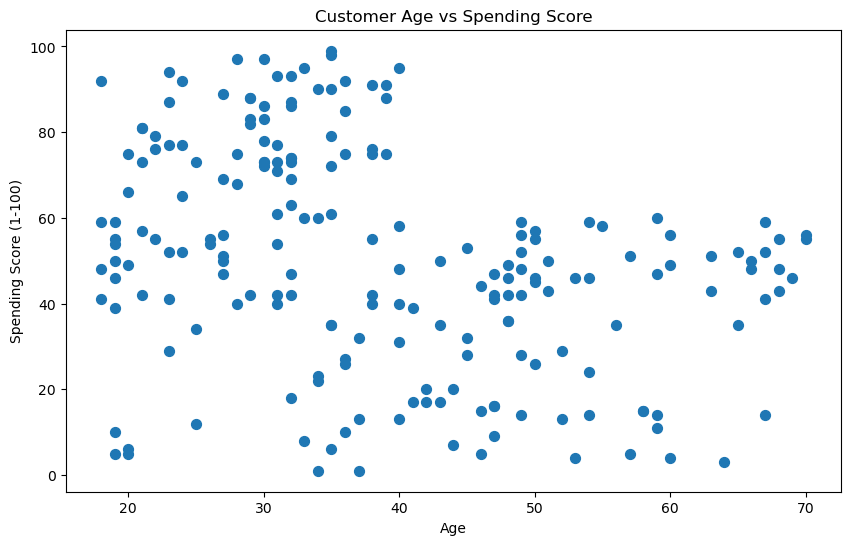

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df_cust['Age'], df_cust['Spending Score (1-100)'], s=50)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Age vs Spending Score')
plt.show()

In [27]:
elbow = df_cust[['Age', 'Spending Score (1-100)']].iloc[:,:].values
elbow

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [28]:
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=.0001,random_state=42,algorithm='elkan')
    kmeans.fit(elbow)
    inertia.append(kmeans.inertia_)

e:\new folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
e:\new folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


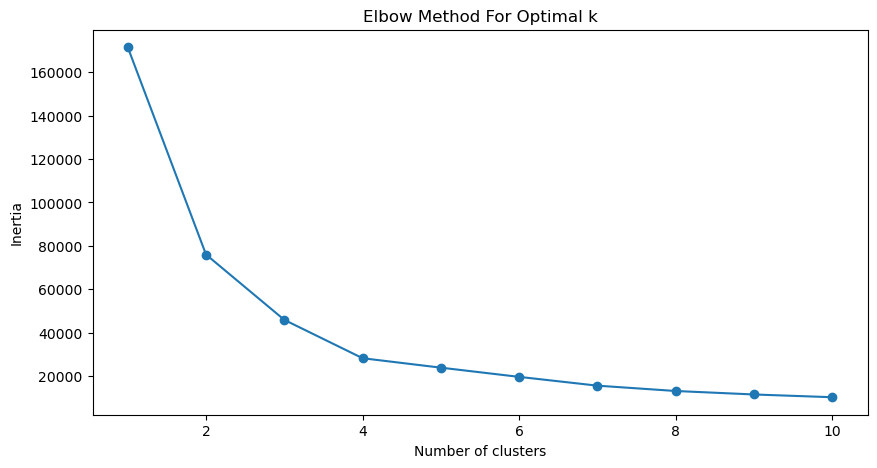

In [29]:
plt.subplots(figsize=(10,5))
plt.plot(np.arange(1,11),inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
algo_3 = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=.0001,random_state=42,algorithm='elkan')
algo_3.fit(elbow)

KMeans(algorithm='elkan', n_clusters=3, n_init=10, random_state=42)

In [31]:
lablels = algo_3.labels_
centroids = algo_3.cluster_centers_
lablels

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [32]:
centroids

array([[43.05494505, 47.78021978],
       [29.56451613, 80.74193548],
       [42.95744681, 14.59574468]])

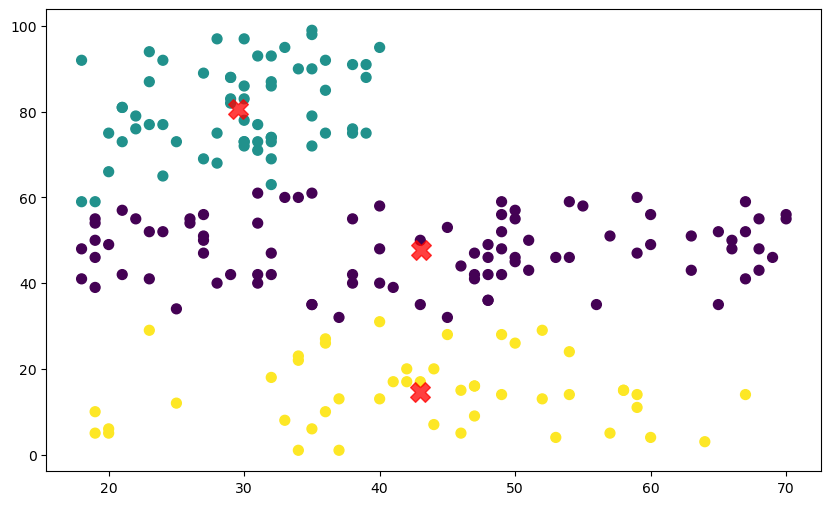

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(elbow[:,0], elbow[:,1], c=lablels, s=50, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.show()